## Quantile Regressions
### Dream Team

In [1]:
]activate proxgrad

 Activating environment at `C:\Users\darre\Documents\_cornell 20-21\orie 4741\dream-team\proxgrad models\proxgrad\Project.toml`


In [2]:
using CSV, Plots, DataFrames, Statistics, LinearAlgebra, LowRankModels, Random
include("proxgrad.jl")
include("../plot_pred.jl")

plot_pred_true (generic function with 2 methods)

In [59]:
train_df = CSV.read("../base models/train.csv", DataFrame);
train = Matrix(train_df);
Xtrain = train[:, 1:(end-3)];

# train_std = train[:, 190];
# train_ppr = train[:, 191];
# train_half = train[:, 192];

train_std = train[:, end-2];
train_ppr = train[:, end-1];
train_half = train[:, end];

test_df = CSV.read("../base models/test.csv", DataFrame);
test = Matrix(test_df);
Xtest = test[:, 1:(end-3)];

# test_std = test[:, 190];
# test_ppr = test[:, 191];
# test_half = test[:, 192];

test_std = test[:, end-2];
test_ppr = test[:, end - 1];
test_half = test[:, end];

In [4]:
"""This function computes the mean squared error."""
function MSE(y, pred)
    error = (y.-pred).^2
    mse = sum(error[:, 1])/size(error, 1)
    return mse
end

MSE

## with proxgrad

In [63]:
n = size(Xtrain, 1)
loss = QuantileLoss(quantile=0.4)
reg = QuadReg(0.001)
# reg = NonNegConstraint()
# reg = QuadReg(0.01)
# reg = OneReg()
w_std = proxgrad(loss, reg, Xtrain, train_std, maxiters=100);
w_ppr = proxgrad(loss, reg, Xtrain, train_ppr, maxiters=100);
w_half = proxgrad(loss, reg, Xtrain, train_half, maxiters = 100);

In [64]:
test_pred = sum(w_std'.*Xtest, dims = 2)
test_pred_ppr = sum(w_ppr'.*Xtest, dims = 2)
test_pred_half = sum(w_half'.*Xtest, dims = 2)

test_MSE = MSE(test_std, test_pred)

59.302864781806015

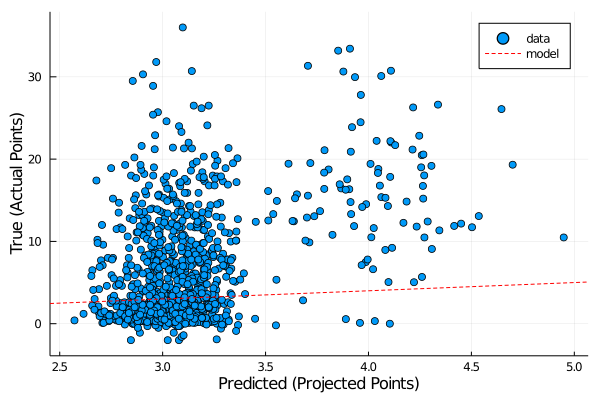

In [62]:
plot_pred_true(test_pred, test_std)

In [44]:
test_pred_all = CSV.read("../base models/test_pred.csv", DataFrame)
test_pred_all.std_q = vec(test_pred)
test_pred_all.ppr_q = vec(test_pred_ppr)
test_pred_all.half_q = vec(test_pred_half);
# CSV.write("..\\base models\\test_pred.csv", test_pred_all)

"..\\base models\\test_pred.csv"